In [252]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('../datasets/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [185]:
df.shape

(200000, 9)

**Preprocessing the dataset**

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [187]:
len(df['key'].unique())

200000

In [188]:
# Dropping redundant columns
df.drop(columns=['Unnamed: 0','key'], axis=1, inplace=True)

In [189]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [190]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [191]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [192]:
df.dropna(inplace=True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [193]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).astype(int) / 10**9
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5
5,4.9,1.297478e+09,-73.969019,40.755910,-73.969019,40.755910,1
6,24.5,1.413097e+09,-73.961447,40.693965,-73.871195,40.774297,5
7,2.5,1.355234e+09,0.000000,0.000000,0.000000,0.000000,1
8,9.7,1.329471e+09,-73.975187,40.745767,-74.002720,40.743537,1
9,12.5,1.333048e+09,-74.001065,40.741787,-73.963040,40.775012,1


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  float64
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 12.2 MB


**Handling Outliers**

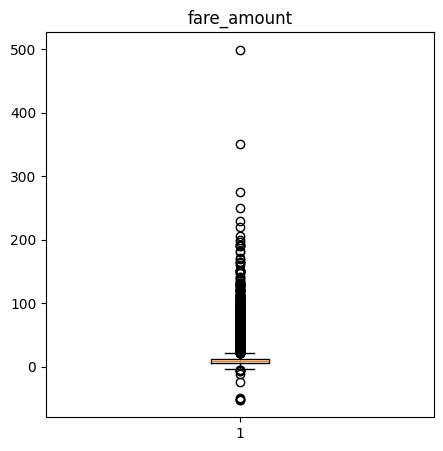

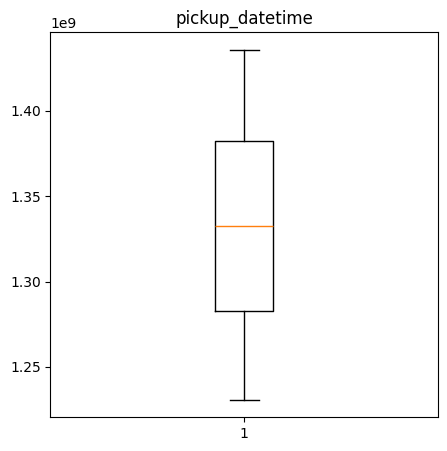

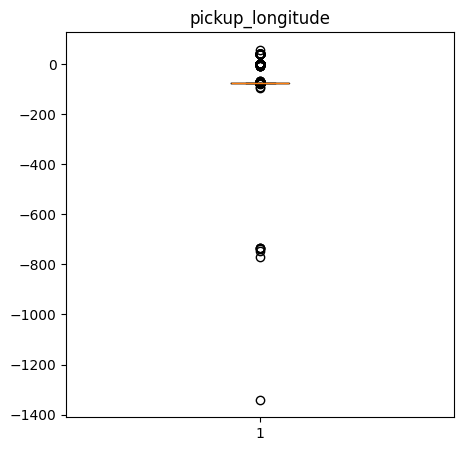

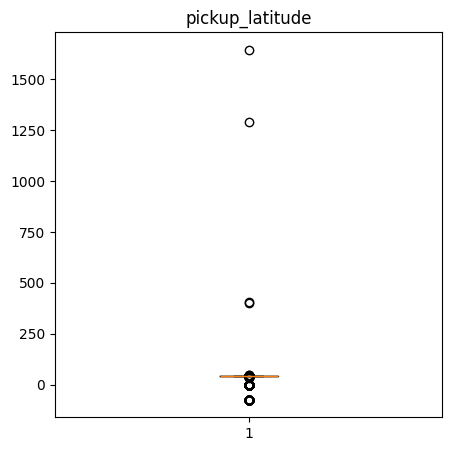

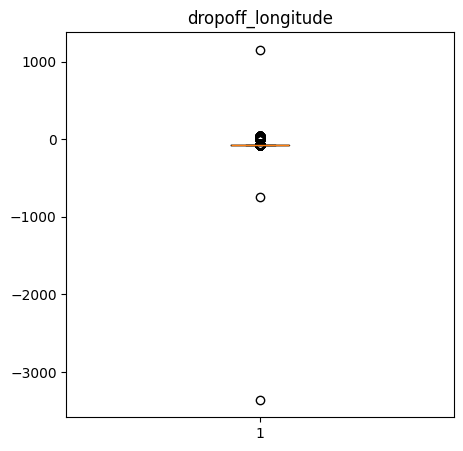

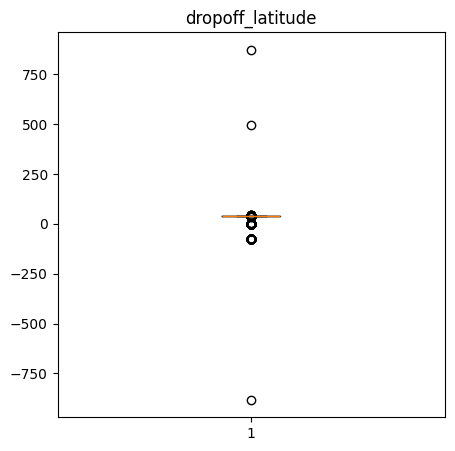

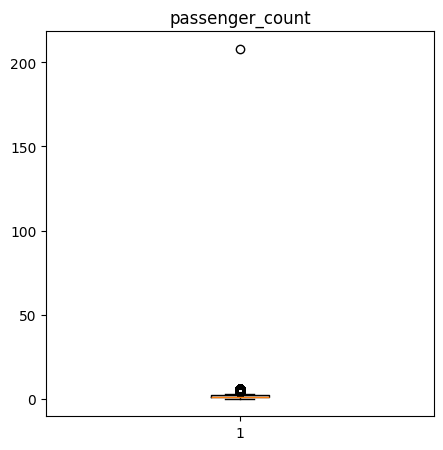

In [195]:
for col in df.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(x=df[col])
    plt.title(col)

In [196]:
# Handling outliers in longitudes and latitudes

df = df[
    (df['pickup_latitude'] <= 90) & (df['dropoff_latitude'] <= 90) & 
    (df['pickup_latitude'] >= -90) & (df['dropoff_latitude'] >= -90) &
    (df['pickup_longitude'] <= 180) & (df['dropoff_longitude'] <= 180) &
    (df['pickup_longitude'] >= -180) & (df['dropoff_longitude'] >= -180)
]

df.shape

(199987, 7)

**Correlation**

<Axes: >

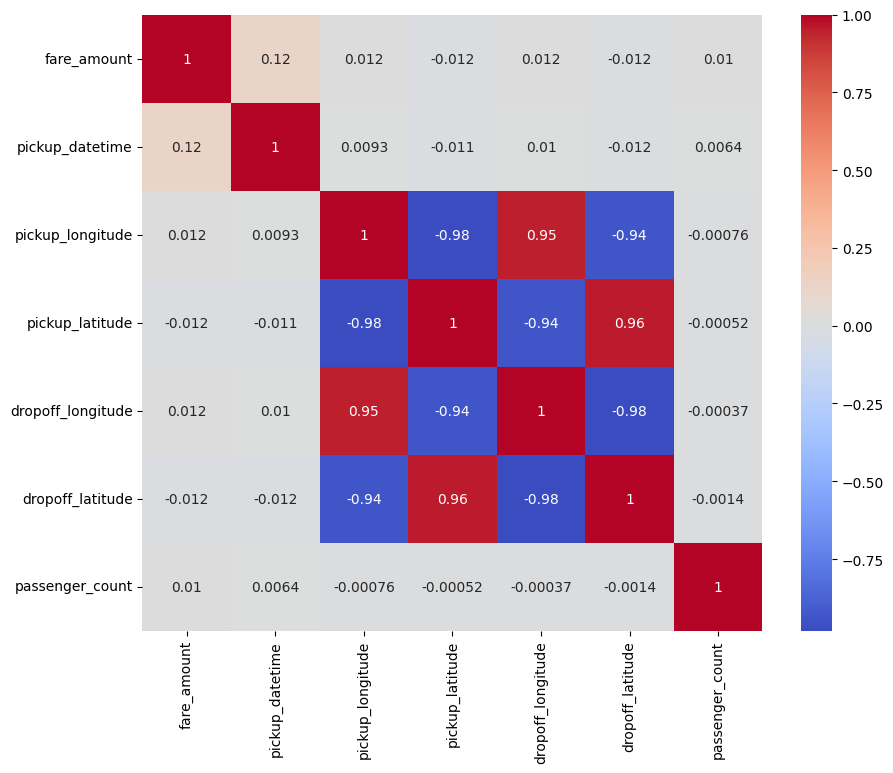

In [197]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

**Calculating distance parameter**

In [198]:
def calc_dist(lat_1, lat_2, lon_1, lon_2):
    lat_1,lat_2,lon_1,lon_2 = map(np.radians, [lat_1,lat_2,lon_1,lon_2])
    diff_lat = lat_2 - lat_1
    diff_lon = lon_2 - lon_1
    
    dist = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2)**2 + np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2)**2))

    return dist

In [199]:
df['Distance'] = [calc_dist(
                    df['dropoff_latitude'][i],
                    df['pickup_latitude'][i],
                    df['dropoff_longitude'][i],
                    df['pickup_longitude'][i])
                    for i in df.index
                 ]
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
5,4.9,1.297478e+09,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
6,24.5,1.413097e+09,-73.961447,40.693965,-73.871195,40.774297,5,11.731015
7,2.5,1.355234e+09,0.000000,0.000000,0.000000,0.000000,1,0.000000
8,9.7,1.329471e+09,-73.975187,40.745767,-74.002720,40.743537,1,2.332711
9,12.5,1.333048e+09,-74.001065,40.741787,-73.963040,40.775012,1,4.889417


<Axes: xlabel='Distance'>

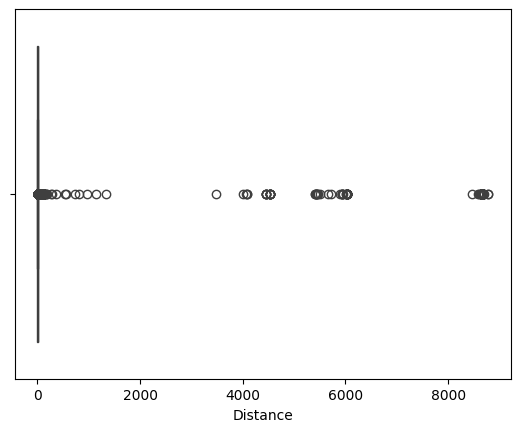

In [200]:
sns.boxplot(x=df['Distance'])

In [201]:
# Removing distance outliers

q1 = np.percentile(df['Distance'],25)
q3 = np.percentile(df['Distance'],75)

iqr = q3-q1 
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

df = df[(df['Distance'] < upper_limit) & (df['Distance'] > lower_limit)]

df.shape

(183238, 8)

**Regression Models**

In [313]:
X = df[['pickup_datetime','passenger_count','Distance']]
y = df.iloc[:,0]

In [314]:
X

,pickup_datetime,passenger_count,Distance
0,1.431028e+09,1,1.683323
1,1.247861e+09,1,2.457590
2,1.251150e+09,1,5.036377
3,1.246005e+09,3,1.661683
4,1.409248e+09,5,4.475450
...,...,...,...
199994,1.391179e+09,1,1.122878
199995,1.351421e+09,1,0.112210
199996,1.394759e+09,1,1.875050
199998,1.432134e+09,1,3.539715


In [315]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 183238, dtype: float64

In [316]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [317]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.60951367,  2.34269625, -0.18355663],
       [-0.52294641, -0.48373089, -0.81925102],
       [ 0.42640678, -0.48373089,  1.38669511],
       ...,
       [-0.68853862,  2.34269625,  1.42533314],
       [-1.30670023, -0.48373089,  1.49068704],
       [-1.40872676, -0.48373089, -0.91348433]])

In [318]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(146590, 3)

(36648, 3)

(146590,)

(36648,)

In [319]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [320]:
# X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
# X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [321]:
lr.fit(X_train, y_train)

LinearRegression()

In [322]:
y_pred = lr.predict(X_test)
y_pred

array([[ 7.0329989 ],
       [ 7.95494476],
       [10.11272912],
       ...,
       [14.55990975],
       [ 9.88676556],
       [ 5.47269878]])

In [323]:
y_test

array([[ 4.5],
       [ 6. ],
       [ 9. ],
       ...,
       [11. ],
       [ 8.1],
       [ 4.9]])

In [324]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  2.152188447074274
Mean Squared Error:  20.459052267464664
RMSE:  4.52316838813952
R2 Score:  0.36000000125571097


**Random Forest Regression**

In [337]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=2)

In [338]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=2)

In [340]:
y_pred_rfr = rfr.predict(X_test)
y_pred_rfr

array([ 7.2  ,  7.365, 10.365, ..., 16.45 ,  8.148,  5.653])

In [341]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred_rfr))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred_rfr))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred_rfr))

Mean Absolute Error:  2.1701764402137194
Mean Squared Error:  21.353400909097292
RMSE:  4.620974021686044
R2 Score:  0.33202299029552684


In [329]:
# Hyparameter Tuning

r2Scores = []
for i in range(1,31):
    rfr = RandomForestRegressor(n_estimators=i, random_state=2)
    rfr.fit(X_train, y_train)
    y_pred_rfr = rfr.predict(X_test)
    r2Scores.append(metrics.r2_score(y_test, y_pred_rfr))

Text(0.5, 1.0, 'Elbow Plot - Random Forest Regression')

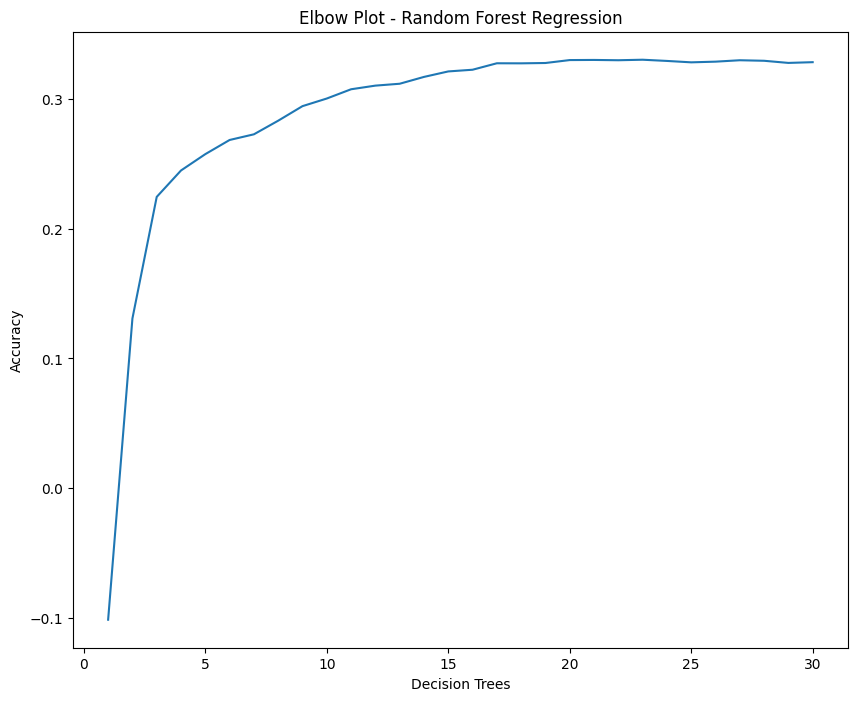

In [331]:
plt.figure(figsize=(10,8))
plt.plot(range(1,31), r2Scores)
plt.xlabel("Decision Trees")
plt.ylabel("Accuracy")
plt.title("Elbow Plot - Random Forest Regression")

In [363]:
X_train

array([[ 1.60951367,  2.34269625, -0.18355663],
       [-0.52294641, -0.48373089, -0.81925102],
       [ 0.42640678, -0.48373089,  1.38669511],
       ...,
       [-0.68853862,  2.34269625,  1.42533314],
       [-1.30670023, -0.48373089,  1.49068704],
       [-1.40872676, -0.48373089, -0.91348433]])

ValueError: x and y must be the same size

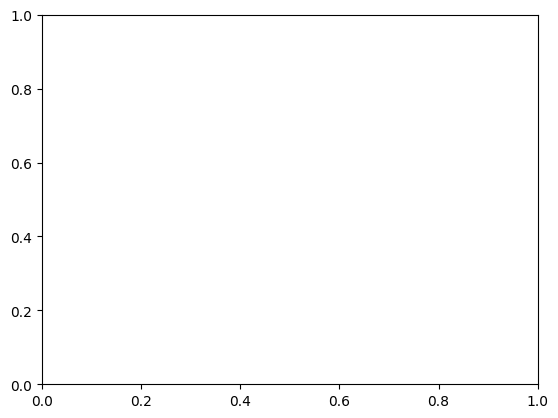

In [362]:
plt.scatter(X_train, y_train)
plt.plot(X_train.iloc[:,-1], rfr.predict(X_train), color='red')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

**Testing without using distance**

In [339]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,normalized_distance,normalized_dates
0,7.5,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,-0.419056,1.702061
1,7.7,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,0.036364,-1.444139
2,12.9,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,1.553195,-1.387642
3,5.3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,-0.431784,-1.476028
4,16.0,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,1.223260,1.327948


In [364]:
X2 = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','normalized_distance','normalized_dates']]
y2 = df['fare_amount']
X2

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,normalized_distance,normalized_dates
0,-73.999817,40.738354,-73.999512,40.723217,1,-0.419056,1.702061
1,-73.994355,40.728225,-73.994710,40.750325,1,0.036364,-1.444139
2,-74.005043,40.740770,-73.962565,40.772647,1,1.553195,-1.387642
3,-73.976124,40.790844,-73.965316,40.803349,3,-0.431784,-1.476028
4,-73.925023,40.744085,-73.973082,40.761247,5,1.223260,1.327948
...,...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1,-0.748707,1.017589
199995,-73.987042,40.739367,-73.986525,40.740297,1,-1.343176,0.334679
199996,-73.984722,40.736837,-74.006672,40.739620,1,-0.306283,1.079081
199998,-73.997124,40.725452,-73.983215,40.695415,1,0.672866,1.721049


In [365]:
y2

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 183238, dtype: float64

In [366]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=2)

In [370]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [371]:
y2_pred = lr2.predict(X2_test)
y2_pred

array([ 6.75304258,  7.5711777 ,  9.76953219, ..., 15.10585763,
       10.09051536,  5.14612717])

In [372]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y2_test, y2_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y2_test, y2_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("R2 Score: ", metrics.r2_score(y2_test, y2_pred))

Mean Absolute Error:  2.06457126598184
Mean Squared Error:  19.394990563586177
RMSE:  4.403974405419062
R2 Score:  0.3932859756128442


In [373]:
rfr2 = RandomForestRegressor(n_estimators=100,random_state=2)
rfr2.fit(X2_train, y2_train)

RandomForestRegressor(random_state=2)

In [374]:
y2_pred_rfr = rfr2.predict(X2_test)

In [375]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y2_test, y2_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y2_test, y2_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print("R2 Score: ", metrics.r2_score(y2_test, y2_pred))

Mean Absolute Error:  2.06457126598184
Mean Squared Error:  19.394990563586177
RMSE:  4.403974405419062
R2 Score:  0.3932859756128442
